In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


In [5]:
filename = 'data/preprocessing/220216_preprocessed_data_missing_data.csv'
df_survey = pd.read_csv(filename, encoding='utf-8')
df_survey.head(3)

,gender,postnr,region,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,...,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum
0,Man,2830,Capital,4.796778,5.0,7.0,4.0,7.0,4.0,5.0,...,0,0,1,0,0,0,2.0,4.0,4.0,2.0
1,Woman,4654,Zealand,7.000000,7.0,7.0,5.0,7.0,6.0,5.0,...,0,0,1,0,0,0,2.0,4.0,2.0,4.0
2,Woman,7451,Central,7.000000,7.0,7.0,7.0,7.0,4.0,3.0,...,0,0,1,0,0,0,NaN,NaN,NaN,NaN


In [6]:
non_behaviour_cols = ['gender','postnr', 'region', 'season','Q10_education', 'Q11_nr_members_household',
 'Q12_nr_children_household','age_num', 'Q14_ocupation_pensioner',
 'Q14_ocupation_employee_private',
 'Q14_ocupation_unemployed',
 'Q14_ocupation_employee_public',
 'Q14_ocupation_self_employed',
 'Q14_ocupation_student',
 'Q14_ocupation_other',
 'Q15_economic_spectrum',
 'Q15_social_spectrum',
 'Q16_economic_spectrum',
 'Q16_social_spectrum',
 'date',
 'Q7_1_last_week_fever',
 'Q7_2_last_week_cough',
 'Q7_3_last_week_sore_throat',
 'Q7_4_last_week_no_smell_taste',
 'Q7_5_last_week_shortness_breath',
 'Q2020NovNy1',
 'Q2020NovNy2_tested_positive',
 'Q2020NovNy3',
 'Q2020NovNy4', 'Ny1_nr_times_wearing_masks_last_week']

In [7]:
behaviour_cols = df_survey.columns.tolist()
for element in non_behaviour_cols:
    if element in behaviour_cols:
        behaviour_cols.remove(element)


In [8]:
nr_contacts = ['Q4_1_nr_contact_nonhouse_family', 'Q4_2_nr_contact_colleagues',
               'Q4_3_nr_contact_friends', 'Q4_4_nr_contact_strangers']

for element in nr_contacts:
    if element in behaviour_cols:
        behaviour_cols.remove(element)

df_survey_beh = df_survey[behaviour_cols]
df_survey_beh.head()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,...,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy
0,4.796778,5.0,7.0,4.0,7.0,4.0,5.0,6.0,7.0,5.0,...,7.0,7.0,5.837379,1.0,7.0,5.0,7.0,7.0,6.0,6.0
1,7.000000,7.0,7.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0,...,7.0,7.0,7.000000,1.0,6.0,5.0,7.0,6.0,2.0,7.0
2,7.000000,7.0,7.0,7.0,7.0,4.0,3.0,7.0,7.0,5.0,...,7.0,5.0,7.000000,7.0,7.0,5.0,4.0,7.0,2.0,7.0
3,6.000000,1.0,7.0,2.0,1.0,7.0,4.0,7.0,3.0,7.0,...,7.0,5.0,7.000000,7.0,7.0,4.0,1.0,7.0,3.0,7.0
4,5.000000,1.0,1.0,2.0,1.0,2.0,2.0,5.0,6.0,4.0,...,7.0,5.0,4.000000,6.0,1.0,2.0,1.0,2.0,1.0,1.0


In [9]:
df_survey_beh.columns

Index(['Q1_2_covid_is_threat', 'Q2_1_easy_to_follow_advice',
       'Q2_2_can_follow_advice_if_wanted', 'Q2_3_if_follow_advice_safe',
       'Q2_4_if_follow_advice_others_safe',
       'Q2_5_follow_advice_relationships_impared',
       'Q2_6_follow_advice_life_degraded', 'Q3_1_aware_hand_hygiene',
       'Q3_2_avoid_contact', 'Q3_3_ensure_frequent_cleaning',
       'Q3_4_avoid_risk_groups', 'Q3_5_keep_distance', 'Q3_6_avoid_crowds',
       'Q3_7_minimize_activities_w_contact', 'Q5_4_yourself_kept_distance',
       'Q5_5_feel_urge_scold', 'Q6_2_advices_important',
       'Q6_3_others_can_avoid_spreading', 'Q6_5_ownership_of_advice',
       'Q6_6_clear_information_on_advice_reason',
       'Q6_7_advice_limits_daily_activities', 'Q6_9_trust_political_strategy'],
      dtype='object')

In [10]:
len(df_survey_beh.columns)

22

In [11]:
df_survey_beh.describe()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,...,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy
count,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,...,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000,122829.000000
mean,4.796778,5.462002,5.986052,5.429773,6.034948,4.286359,3.467744,6.302684,5.519201,5.152733,...,5.477979,5.187702,5.837379,2.676266,5.877590,4.522658,5.617431,5.273364,4.220670,5.030595
std,1.771060,1.683511,1.616011,1.684169,1.606819,2.009169,1.920828,1.158365,1.667421,1.681898,...,1.736721,1.787495,1.323913,2.022423,1.483476,1.556467,1.575232,1.760689,1.945143,1.838950
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,6.000000,4.000000,6.000000,3.000000,2.000000,6.000000,5.000000,4.000000,...,5.000000,4.000000,5.000000,1.000000,5.000000,4.000000,5.000000,4.000000,3.000000,4.000000
50%,5.000000,6.000000,7.000000,6.000000,7.000000,4.000000,4.000000,7.000000,6.000000,5.000000,...,6.000000,5.187702,6.000000,2.000000,6.000000,4.522658,6.000000,6.000000,4.000000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,4.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [12]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df_survey_beh)
df_survey_beh_scaled = pd.DataFrame(data=x, columns=df_survey_beh.columns)
df_survey_beh_scaled.head()

,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,Q3_3_ensure_frequent_cleaning,...,Q3_6_avoid_crowds,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy
0,-5.014975e-16,-0.274429,0.627441,-0.848952,0.6006,-0.142527,0.797709,-0.261304,0.888081,-0.090810,...,0.876379,1.013880,6.708763e-16,-0.828844,0.756611,0.306684,0.877696,0.980664,0.914759,0.527153
1,1.244019e+00,0.913569,0.627441,-0.255185,0.6006,0.852914,0.797709,0.601986,0.888081,1.098327,...,0.876379,1.013880,8.781739e-01,-0.828844,0.082516,0.306684,0.877696,0.412702,-1.141653,1.070944
2,1.244019e+00,0.913569,0.627441,0.932349,0.6006,-0.142527,-0.243513,0.601986,0.888081,-0.090810,...,0.876379,-0.105009,8.781739e-01,2.137907,0.756611,0.306684,-1.026793,0.980664,-1.141653,1.070944
3,6.793826e-01,-2.650426,0.627441,-2.036486,-3.1335,1.350634,0.277098,0.601986,-1.510843,1.098327,...,0.876379,-0.105009,8.781739e-01,2.137907,0.756611,-0.335799,-2.931282,0.980664,-0.627550,1.070944
4,1.147466e-01,-2.650426,-3.085420,-2.036486,-3.1335,-1.137967,-0.764124,-1.124593,0.288350,-0.685379,...,0.876379,-0.105009,-1.387845e+00,1.643448,-3.287959,-1.620766,-2.931282,-1.859146,-1.655756,-2.191800


In [59]:
pca = PCA(whiten=True)
x_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(x_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.639591,-0.162702,-0.711649,0.720878,-0.681940,1.254401,0.383294,0.650458,1.067924,0.512884,...,-0.951166,1.319514,0.061972,-0.363741,-1.086205,-0.275553,-0.270591,-0.029517,0.250395,-0.094319
1,-1.132418,-0.192777,-0.379158,-0.150098,-0.375834,0.564165,-1.388443,0.407469,-1.490331,1.622040,...,-0.131487,0.089210,0.408814,-0.535103,-0.867853,-0.182884,0.393254,1.395062,0.194529,0.144040
2,-1.035513,0.283440,0.355890,-0.341522,1.302738,-0.452865,0.525508,-1.529978,-1.869227,0.232083,...,1.352605,0.953570,-1.076057,1.078178,-0.432515,0.347393,0.788566,-0.979597,-0.402879,-1.251171
3,0.169676,-1.796129,0.845639,1.852579,0.768380,-1.558062,0.143525,-0.367936,-1.824915,1.282615,...,1.977185,2.156209,-3.767185,-2.452189,0.419306,2.708716,2.696461,-2.521123,-2.357318,0.614956
4,2.091070,-2.752190,2.938180,-0.213405,1.164145,1.317973,0.524366,-0.984538,-1.028091,-1.114620,...,0.506879,0.225487,-0.405186,0.597537,0.482087,0.993853,-0.884658,0.196466,0.745332,-1.438370


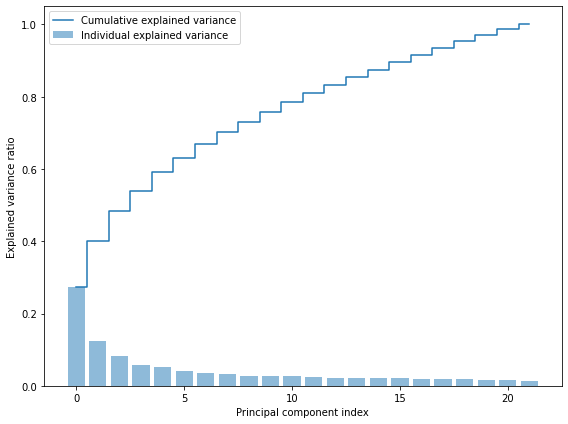

In [60]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [78]:
nr_pc_80 = (cum_sum_eigenvalues<=0.8).sum()
print(nr_pc_80,  ' Werte erklären 80% der Daten.')

11  Werte erklären 80% der Daten.


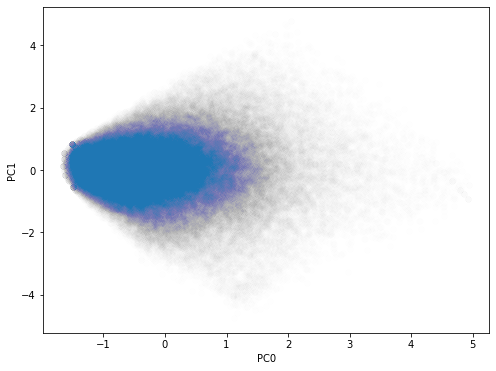

In [62]:
plt.scatter(x=df_pca[0], y=df_pca[1], alpha=0.005)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

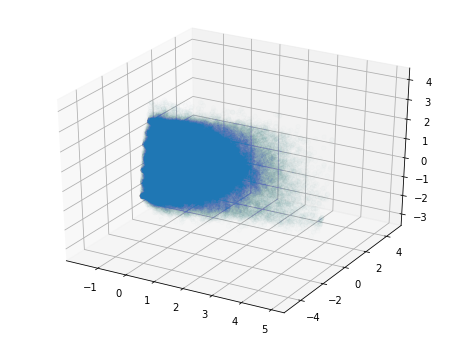

In [72]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca[0], df_pca[1], df_pca[2], alpha=0.008)

,gender,postnr,region,season,Q10_education,Q11_nr_members_household,Q12_nr_children_household,age_num,Q14_ocupation_pensioner,Q14_ocupation_employee_private,...,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath,Q2020NovNy1,Q2020NovNy2_tested_positive,Q2020NovNy3,Q2020NovNy4,Ny1_nr_times_wearing_masks_last_week
0,Man,2830,Capital,4.0,8,1,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0
1,Woman,4654,Zealand,2.0,3,1,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2,Woman,7451,Central,2.0,4,1,0,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
3,Man,4700,Zealand,3.0,3,1,0,5,1,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,4.0
4,Man,4000,Zealand,4.0,4,2,1,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122824,Woman,8220,Central,3.0,2,3,3,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
122825,Woman,7400,Central,2.0,5,2,0,4,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0
122826,Woman,2400,Capital,4.0,2,4,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0
122827,Woman,5700,Southern,2.0,3,3,1,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,2.0


In [101]:
df_pca_write = pd.concat([df_pca.iloc[:,:nr_pc_80+1].copy(), df_survey[non_behaviour_cols]], axis=1)
df_pca_write.to_csv('data/preprocessing/dim_reduction/220321_pca_data.csv', index=False)

# Kernel PCA

In [23]:
df_survey_beh_sample = df_survey_beh.sample(n=10000)

In [24]:
x_sample = StandardScaler().fit_transform(df_survey_beh_sample)

In [25]:
x_sample.shape

(10000, 22)

In [ ]:
# To-Do: Check for positive semi definite -eigenvalues are non-negative

In [65]:
kpca = KernelPCA(n_components=26, eigen_solver='arpack', copy_X=False, kernel='sigmoid')
x_kpca = kpca.fit_transform(x_sample)
df_kpca = pd.DataFrame(x_kpca)
df_kpca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.466390,0.302126,0.118644,0.012638,0.248977,-0.381341,-0.015837,-0.004593,0.138671,-0.350916,...,-0.028234,0.104112,-0.045929,-0.122367,0.085621,-0.011604,-0.034631,-0.000300,0.008577,-0.041149
1,-0.093418,-0.264926,0.183270,-0.147775,0.299435,-0.007069,-0.043500,-0.042675,-0.128777,0.160317,...,0.032661,-0.126259,0.038438,0.040414,0.013526,0.001774,0.042204,-0.014326,-0.030870,0.001323
2,0.309963,0.256956,-0.048864,-0.256740,0.005405,0.024832,-0.054430,-0.170896,-0.040618,-0.054067,...,-0.002022,-0.003709,-0.012431,0.038405,-0.022747,0.082069,-0.054764,-0.035319,0.044554,0.012240
3,0.066850,-0.108863,-0.049323,0.224350,0.078553,0.010610,0.081784,0.054939,0.011856,0.055454,...,-0.088955,-0.033308,0.033609,-0.116695,0.031079,0.069647,0.020821,0.018718,0.013688,0.033658
4,0.567640,-0.529334,0.628120,-0.069331,0.072804,0.093121,0.087517,-0.094965,-0.022075,-0.159308,...,0.070810,-0.088398,-0.048873,0.005095,0.014612,0.028138,-0.122948,0.014118,0.055222,0.244666


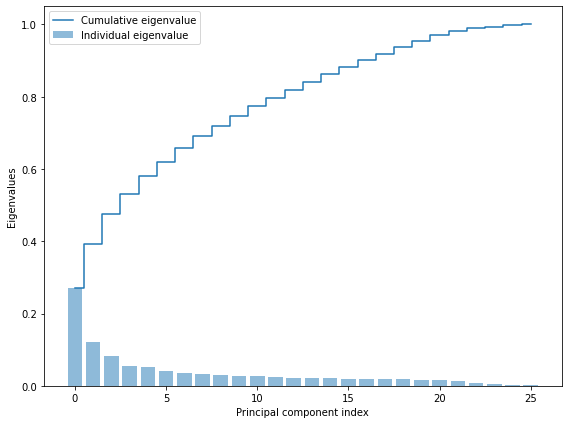

In [66]:
var_values = kpca.eigenvalues_ / sum(kpca.eigenvalues_)

cum_sum_eigenvalues_kpca = np.cumsum(var_values)

plt.bar(range(0,len(var_values)), var_values, alpha=0.5, align='center', label='Individual eigenvalue')
plt.step(range(0,len(cum_sum_eigenvalues_kpca)), cum_sum_eigenvalues_kpca, where='mid',label='Cumulative eigenvalue')
plt.ylabel('Eigenvalues')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [67]:
print((cum_sum_eigenvalues_kpca<=0.8).sum(),  ' Werte erklären 80% der Daten.')

12  Werte erklären 80% der Daten.


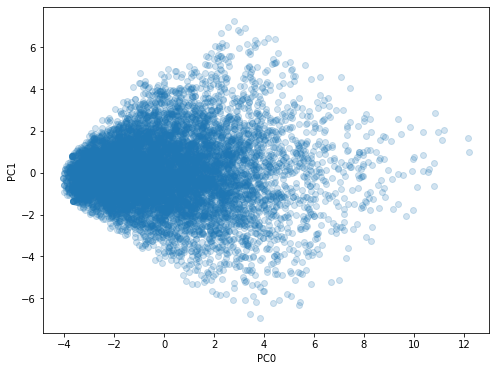

In [64]:
plt.scatter(x=df_kpca[0], y=df_kpca[1], alpha=0.2)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()